In [1]:
import pandas as pd

In [11]:
# Read data from coffees.csv
data = pd.read_csv("coffees.csv")
data.contributor = data.contributor.astype('category')
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [12]:
# accessor which looks for a label
data.loc[2]

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

In [14]:
# accessor which treats data like a NumPy array and just uses an integer index
data.iloc[2]

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

In [17]:
# Gives me a column or Series
data.coffees[:5]

0      397.0
1      410.0
2    testing
3        NaN
4      464.0
Name: coffees, dtype: object

In [21]:
data['coffees'].iloc[:5]

0      397.0
1      410.0
2    testing
3        NaN
4      464.0
Name: coffees, dtype: object

In [18]:
print(len(data))

671


In [19]:
# Basic descriptive statistics
data.describe()

,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2011-11-21 10:06:00,12358.0,Quentin
freq,1,2,367


In [35]:
# We can figure out which entries are null and then use that series as a boolean index
data[data.coffees.isnull()]

,timestamp,coffees,contributor
2,2011-10-05 07:02:00,NaN,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
15,2011-10-07 14:10:00,NaN,Ben
72,2011-10-28 10:53:00,NaN,Mike M
95,2011-11-11 11:13:00,NaN,Quentin
323,2012-06-10 16:10:00,NaN,Sergio
370,2012-07-13 13:59:00,NaN,Mike
394,2012-08-03 14:35:00,NaN,Sergio
479,2012-09-21 10:15:00,NaN,Sergio
562,2012-11-01 09:45:00,NaN,Quentin


In [25]:
data.dtypes

timestamp        object
coffees          object
contributor    category
dtype: object

In [33]:
# Everything was read in as string (read_csv)
print(data.timestamp[0])
print(type(data.timestamp[0]))

2011-10-03 08:22:00
<class 'str'>


In [34]:
data.coffees = data.coffees.apply(pd.to_numeric, errors="coerce")
data.dtypes

timestamp        object
coffees         float64
contributor    category
dtype: object

In [39]:
data = data.dropna() # Copy
data.dropna(inplace=True) # Doing it in place

In [41]:
data.coffees = data.coffees.astype(int)
data.dtypes

timestamp        object
coffees           int64
contributor    category
dtype: object

In [47]:
data.timestamp = data.timestamp.apply(pd.to_datetime)
data.dtypes
data.timestamp.head()

0   2011-10-03 08:22:00
1   2011-10-04 11:48:00
4   2011-10-05 10:47:00
5   2011-10-05 13:15:00
6   2011-10-06 07:21:00
Name: timestamp, dtype: datetime64[ns]

In [51]:
data.describe()

,coffees
count,657.000000
mean,8568.471842
std,4600.215049
min,397.000000
25%,4986.000000
50%,9172.000000
75%,11562.000000
max,24463.000000


In [50]:
data.describe(include="all")

,timestamp,coffees,contributor
count,657,657.000000,657
unique,657,NaN,9
top,2011-10-24 14:32:00,NaN,Quentin
freq,1,NaN,361
first,2011-10-03 08:22:00,NaN,NaN
last,2013-09-13 10:28:00,NaN,NaN
mean,NaN,8568.471842,NaN
std,NaN,4600.215049,NaN
min,NaN,397.000000,NaN
25%,NaN,4986.000000,NaN


In [52]:
data.iloc[:5]

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


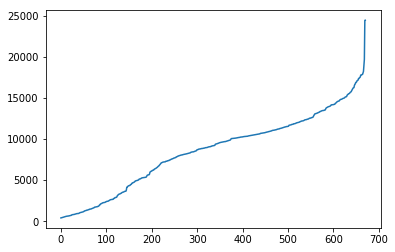

In [57]:
%matplotlib inline
data.coffees.plot()